In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
pd.set_option('display.max_colwidth', -1)

#### Import the data and get a high-level picture

In [108]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [109]:
df.shape

(29922, 6)

In [110]:
df.dtypes

order_id      int64 
name          object
ordered_at    object
price         object
quantity      int64 
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [111]:
df['ordered_at']=pd.to_datetime(df['ordered_at'])

In [112]:
# df['price']=df['price'].astype(float)
# df['line_total']=df['line_total'].astype(float)

In [113]:
df['price']=df['price'].replace('[\$,]', '', regex=True).astype(float)
df['line_total']=df['line_total'].replace('[\$,]', '', regex=True).astype(float)

In [114]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5


In [115]:
df.dtypes

order_id      int64         
name          object        
ordered_at    datetime64[ns]
price         float64       
quantity      int64         
line_total    float64       
dtype: object

#### TODO: drop if duplicated or null

In [116]:
df[df.duplicated()].shape[0]

538

In [117]:
print(df.shape)
df=df[(df.duplicated()==False)]
print(df.shape)

(29922, 6)
(29384, 6)


In [118]:
df.count()

order_id      29384
name          27903
ordered_at    29384
price         29384
quantity      29384
line_total    29384
dtype: int64

In [119]:
print(df.shape)
df=df[(df.name.isnull()==False)]
print(df.shape)

(29384, 6)
(27903, 6)


In [120]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [121]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [122]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [123]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [124]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


In [125]:
print(df.shape)
df=df[(df['line_total']>=0)]
print(df.shape)

(27903, 6)
(27624, 6)


In [126]:
import numpy as np

In [127]:
# df[(df['price']*df['quantity']!=df['line_total'])]['line_total']=df['price']*df['quantity']
df.loc[df['line_total'] != df['price']*df['quantity'], 'line_total'] = df['price']*df['quantity']

In [128]:
df[(df['price']*df['quantity']!=df['line_total'])]

,order_id,name,ordered_at,price,quantity,line_total


In [129]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [130]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27624 entries, 0 to 29821
Data columns (total 6 columns):
order_id      27624 non-null int64
name          27624 non-null object
ordered_at    27624 non-null datetime64[ns]
price         27624 non-null float64
quantity      27624 non-null int64
line_total    27624 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.7+ MB


In [132]:
df['name'].value_counts()

"ICE CREAM" Mint Chip             1088
"SORBET" Lemon                    1087
"ICE CREAM" Candied Bacon         1073
"CONE" Sugar Cone                 1057
"ICE CREAM" Double Fudge Chunk    1053
"ICE CREAM" Rocky Road            1051
"ICE CREAM" Dark Chocolate        1048
"CONE" Cookie Cone                1045
"SORBET" Raspberry                1044
"CONE" Dipped Waffle Cone         1033
"ICE CREAM" Maple Brown Sugar     1028
"SORBET" Blood Orange             1027
"BEVERAGE" Iced Coffee            1024
"CONE" Brownie Cone               1023
"ICE CREAM" Wildberry             1022
"ICE CREAM" Dulce De Leche        1017
"ICE CREAM" Matcha                1011
"ICE CREAM" Vanilla Bean          1010
"ICE CREAM" Strawberry            1009
"BEVERAGE" Espresso               1002
"SORBET" Lychee                   994 
"SORBET" Watermelon               994 
"ICE CREAM" Earl Gray             993 
"ICE CREAM" Peanut Fudge          983 
"BEVERAGE" Tea                    971 
"CONE" Waffle Cone       

In [134]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


In [135]:
df['category']=df['name'].str.partition('" ')[0]
df['name']=df['name'].str.partition('" ')[2]
df['category'] = df['category'].str.replace('"','')
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

In [136]:
df.name.value_counts()

Mint Chip             1088
Lemon                 1087
Candied Bacon         1073
Sugar Cone            1057
Double Fudge Chunk    1053
Rocky Road            1051
Dark Chocolate        1048
Cookie Cone           1045
Raspberry             1044
Dipped Waffle Cone    1033
Maple Brown Sugar     1028
Blood Orange          1027
Iced Coffee           1024
Brownie Cone          1023
Wildberry             1022
Dulce De Leche        1017
Matcha                1011
Vanilla Bean          1010
Strawberry            1009
Espresso              1002
Lychee                994 
Watermelon            994 
Earl Gray             993 
Peanut Fudge          983 
Tea                   971 
Waffle Cone           969 
Ice Cream Cake        968 
Name: name, dtype: int64

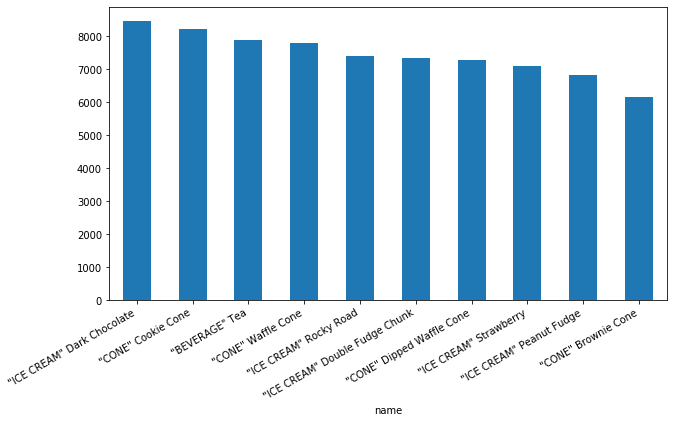

In [55]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

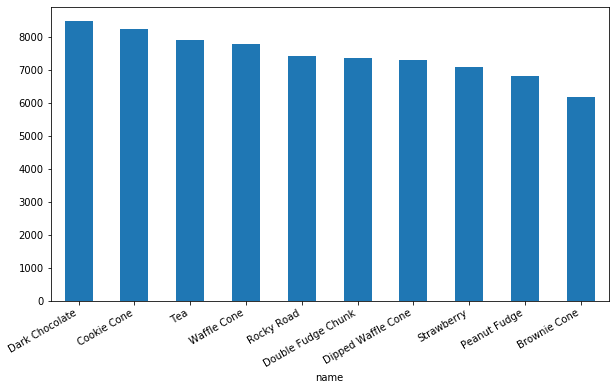

In [137]:
## figure here
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

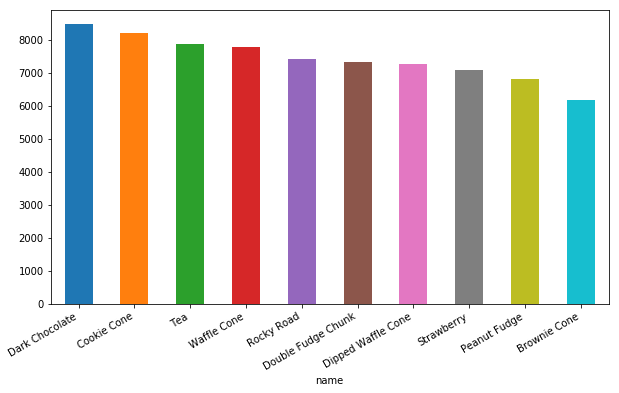

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()